# Single Receipt

In [15]:
!pip install pytesseract
!pip install llama_index

In [16]:
from PIL import Image
import pytesseract

# Set the tesseract command path for Mac/Linux
pytesseract.pytesseract.tesseract_cmd = "/usr/local/bin/tesseract"

# For Windows
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load image
image = Image.open("./receipts/receipt1.png")

# Extract text using Tesseract OCR
extracted_text = pytesseract.image_to_string(image)

print("Extracted Text:", extracted_text)

Extracted Text: INVOICE

INVOICE # DATE OF ISSUE
1000-15088 12/06/2023
BILL TO

Client Name
Street address
City, State, Country
ZIP Code

‘fémplateLAB

CLEANING PERIOD INCLUDED
01/05/2023-31/05/2023

CLEANING SERVICES
2001 Street Name

City, State, Country, ZiP code
(000) 123 456 7890
cleaningservices@email.com
cleaningservices123.com

DESCRIPTION UNIT COST aTy AMOUNT
Curtain Cleani
main keaning $40.00 3 120.00
Superior dry cleaning on-site
G Cleani
ren kieaning $50.00 2 100.00
Eco-friendly cleaning by using products that are non-toxic, biodegradable, and safe
P Wash
ressuremasning $110.00 1 110.00
Jet washer to deliver a powerful water stream to remove dirt and clean surfaces
Chi s i
mney Sweeping $105.00 1 105.00
Chimney sweeping to prevent soot build-up, which is a fire hazard
Ceil id Wall Cleani
Suing ange earings $35.00 8 280.00
Removing dirt, oil, and other grime on walls and ceilings
Sanitization Servi
anitization Services $60.00 3 180.00
Using Hydrogen peroxide to wipe down sur

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = ""  # replace with yours

In [18]:
from llama_index.core import Document, VectorStoreIndex

# Create a Document object from the extracted text
doc = Document(text = extracted_text, 
               metadata = {"source": "receipt1.png"}
              )

# Add to your RAG pipeline (e.g., LlamaIndex)
index = VectorStoreIndex.from_documents(
    [doc]
)

# Save the index
index.storage_context.persist(persist_dir = "./receiptsembeddings")

In [19]:
query_engine = index.as_query_engine()

while True:
    question = input("Question: ")
    if question.lower() == 'quit': break
    response = query_engine.query(question)
    print(response.response)

# Multiple Receipts

In this section, you have several receipts in the "receipts" folder. Your system will load all the receipts from this folder
and then use OCR to extract all the text data. The data extracted from each receipt will be saved in a CSV file.
The csv file will then be loaded and indexed. 


## Extracting the text from receipts

In [20]:
import os
from PIL import Image
import pytesseract

# Path to folder with receipt images
folder_path = "./receipts"

# List to store extracted text
receipts_data = []

# Process each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".pdf"):
        file_path = os.path.join(folder_path, filename)
        
        # For images
        if filename.endswith((".jpg", ".png")):
            image = Image.open(file_path)
            extracted_text = pytesseract.image_to_string(image)

        # Add extracted text to the list
        receipts_data.append({"file_name": filename, "text": extracted_text})

# Print all extracted data
for receipt in receipts_data:
    print(f"Receipt: {receipt['file_name']}")
    print(receipt["text"])

KeyboardInterrupt: 

## Writing the receipts data to CSV

In [ ]:
import csv

# Save to CSV
csv_file = "receipts_data.csv"
with open(csv_file, mode = "w", newline = "", encoding="utf-8") as file:
    writer = csv.DictWriter(file, fieldnames=["file_name", "text"])
    writer.writeheader()
    writer.writerows(receipts_data)

print(f"Receipts data saved to {csv_file}")


Receipts data saved to receipts_data.csv


## Reading the receipts data from CSV

In [ ]:
import pandas as pd

# Read CSV file as a list of rows
csv_file = "receipts_data.csv"

df = pd.read_csv(csv_file)     # encoding="utf-8"
display(df)

# Convert the DataFrame to a list of dictionaries (row-level data)
receipts_data = df.to_dict(orient='records')
receipts_data

,file_name,text
0,receipt5.png,"YOUR\nLOGO\n\nINVOICE\n\nDate: 02 June, 2030\n..."
1,receipt4.png,"D Stark Industries\n\nStark Industries tt,\n11..."
2,receipt6.png,"Zylker Electronics Hub\n\n14B, Northern Street..."
3,receipt7.png,ABC\n\nBillto: John Smith\n442 Swansea Street ...
4,receipt3.png,Graphic Design Invoice\n\nBill To\n\nName\nMic...
5,receipt2.png,TCT eT)\n\nSTROSS eee ee\n\n(55) 5550192 Due: ...
6,receipt1.png,INVOICE\n\nINVOICE # DATE OF ISSUE\n1000-15088...


[{'file_name': 'receipt5.png',
  'text': 'YOUR\nLOGO\n\nINVOICE\n\nDate: 02 June, 2030\n\nBilled to:\n\nStudio Shodwe\n\n123 Anywhere St., Any City\nhello@reallygreatsite.com\n\nItem Quantity\nLogo 1\nBanner (2x6m) 2\nPoster (1x2m) 3\n\nPayment method: Cash\n\nNote: Thank you for choosing us!\n\nNO. 000001\n\nFrom:\n\nOlivia Wilson\n\n123 Anywhere St., Any City\nhello@reallygreatsite.com\n\nPrice Amount\n$500 $500\n$45 $90\n$55 $165\nTotal $755\n\n'},
 {'file_name': 'receipt4.png',
  'text': 'D Stark Industries\n\nStark Industries tt,\n1147 Rohan Orive Suite 819 Buringlon, VE / 62021\nPhone: 904-966-2838\n\nTerms of Sale\n2 10net 30\n\noice Number BANN-0001\nDate: 09 Nov 2023 Due: 09 Dec 2023\n\nDecember\n\nJanuary\n\nFebruary\n\nIlustration\n\nTerms\nPlease make a transfer to\n\nStark Industries\n\nBAN: GB23 2344 233442329234423\nBIC: STRYHKHH\n\nCOMMERCIAL INVOICE\n\nBruce Banner\n1147 Rohan Drive Suite 819- Burlington, VT / 82021\nPhone: 908-966-2836\n\n‘Terms of Payment\n\n‘To be p

## Creating embeddings using OpenAI

In [ ]:
from llama_index.core.schema import TextNode
from llama_index.core import Document, VectorStoreIndex

# create Document directly
# ========================
documents = [
    Document(text=receipt["text"], metadata={"source": receipt["file_name"]}) for receipt in receipts_data
]

# Build the index
index = VectorStoreIndex.from_documents(documents)

## Asking questions

In [ ]:
query_engine = index.as_query_engine()

while True:
    question = input("Question: ")
    if question.lower() == 'quit': break
    response = query_engine.query(question)
    print(response.response)

Total expenses are $929.50.


In the above example, you can ask questions such as "How much did I spend on curtain cleaning?". But questions like "How much did I spend in total" will be difficult for the LLM to answer.

# Using LLM to extract the details of each receipt and save into a CSV file

In [ ]:
import openai
import pandas as pd
from PIL import Image
import pytesseract

# Function to extract text from a receipt image
def extract_text_from_image(image_path):
    try:
        image = Image.open(image_path)
        return pytesseract.image_to_string(image)
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return ""

# Define paths
receipts_folder = "./receipts"
output_csv = "extracted_receipts.csv"

# Prepare storage for processed receipts
all_receipts_data = []

import os
from openai import OpenAI

client = OpenAI(
    api_key = os.environ.get("OPENAI_API_KEY"),
)

# Process each receipt
for receipt_file in os.listdir(receipts_folder):
    if receipt_file.endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        image_path = os.path.join(receipts_folder, receipt_file)
        print(f"Processing: {image_path}")

        # Extract text using Tesseract OCR
        extracted_text = extract_text_from_image(image_path)
        
        # Define the prompt for the LLM
        prompt = f"""
        Receipt: {extracted_text}
        
        Extract details in the following format (no need header; no need for total; one item per line):
        Date(YYYY-MM-DD),Receipt Number,Company,Qty(int),Item,Unit Price (int)
        """
        
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": prompt,
                }
            ],
            model="gpt-4o-mini",
        )

        # Parse the LLM's response
        response = chat_completion.choices[0].message.content

        # Split the response into rows and append to storage
        for line in response.strip().split("\n"):
            all_receipts_data.append([receipt_file] + line.split(","))

# Save the extracted data to a CSV file
columns = ["file_name", "date", "receipt_number", "company", "qty", "item", "unit_price"]
df = pd.DataFrame(all_receipts_data, columns=columns)

df.to_csv(output_csv, index = False)


Processing: ./receipts/receipt5.png
Processing: ./receipts/receipt4.png
Processing: ./receipts/receipt6.png
Processing: ./receipts/receipt7.png
Processing: ./receipts/receipt3.png
Processing: ./receipts/receipt2.png
Processing: ./receipts/receipt1.png


In [ ]:
display(df)

,file_name,date,receipt_number,company,qty,item,unit_price
0,receipt5.png,2023-06-02,000001,Studio Shodwe,1,Logo,500
1,receipt5.png,2023-06-02,000001,Studio Shodwe,2,Banner (2x6m),45
2,receipt5.png,2023-06-02,000001,Studio Shodwe,3,Poster (1x2m),55
3,receipt4.png,2023-11-09,BANN-0001,Stark Industries,20,Tables,25
4,receipt4.png,2023-11-09,BANN-0001,Stark Industries,20,Microwave,25
5,receipt4.png,2023-11-09,BANN-0001,Stark Industries,20,Air Conditioner,25
6,receipt4.png,2023-11-09,BANN-0001,Stark Industries,1,Branded illustration,500
7,receipt6.png,2024-08-05,INV-000001,Zylker Electronics Hub,1,Camera,899
8,receipt6.png,2024-08-05,INV-000001,Zylker Electronics Hub,1,Fitness Tracker,129
9,receipt6.png,2024-08-05,INV-000001,Zylker Electronics Hub,1,Laptop,1199


# Using LLM for analytical questioning

In [21]:
%pip install matplotlib

760.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 750.7 kB/s  0:00:11m0:00:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 726.8 kB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [matplotlib]5 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe for the year 2019
df['date'] = pd.to_datetime(df['date'])
df_2019 = df[df['date'].dt.year == 2019]

# Calculate total spending per item
df_2019['total_spent'] = df_2019['qty'] * df_2019['unit_price']
spending_summary = df_2019.groupby('item')['total_spent'].sum().reset_index()

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.bar(spending_summary['item'], spending_summary['total_spent'], color='skyblue')
plt.title('Total Spending in 2019 by Item')
plt.xlabel('Item')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<string>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


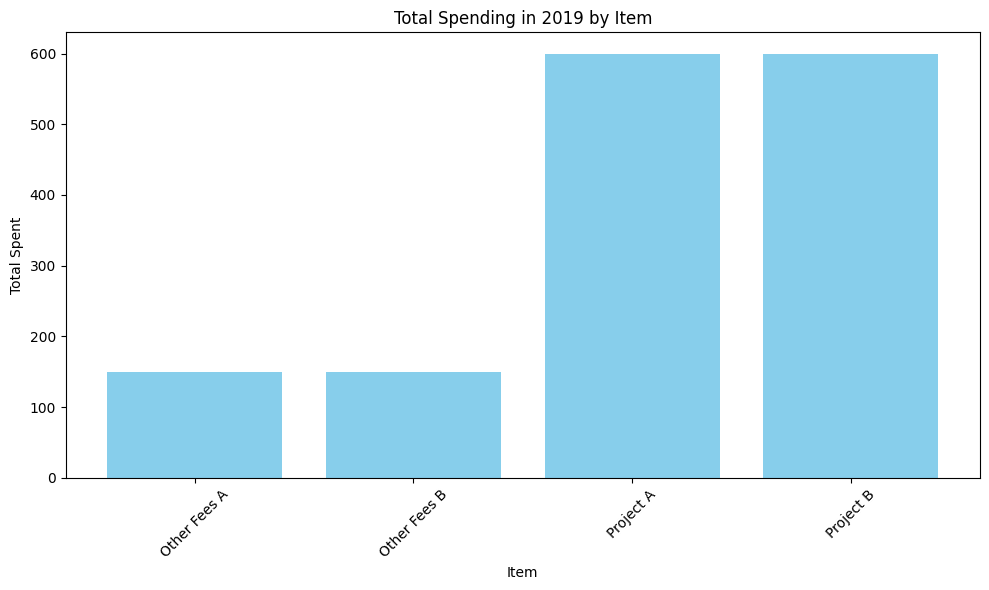

In [22]:
import re

messages = []
messages.append(
    {
        'role':'user',
        'content':'''
        Here is the schema of my data:
        file_name,date,receipt_number,company,qty,item,unit_price

        Here is an example of a sample row:

        receipt5.png,2023-06-02,000001,Studio Shodwe,1,Logo,500  
        receipt5.png,2023-06-02,000001,Studio Shodwe,2,Banner (2x6m),45  
        receipt5.png,2023-06-02,000001,Studio Shodwe,3,Poster (1x2m),55
         
        Return the answer in Python code only and use display() to print the result.
        For your info, I have already loaded the CSV file into a dataframe named df. Ignore all casing when performing string comparison.
        '''
    })

import pandas as pd
df = pd.read_csv('extracted_receipts.csv')

while True:
    prompt = input('\nAsk a question: ') 
    if prompt == "quit":
        break
        
    messages.append(
        {
            'role':'user',
            'content':prompt
        })    
    
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages = messages,
        max_tokens = 1024,
        temperature = 0)
    
    response = completion.choices[0].message.content
    # print(response)
    
    pattern = re.compile(r'```python\s*([\s\S]*)\n```')
    match = pattern.search(response)

    if match:
        extracted_content = match.group(1)
        print(extracted_content)
        if extracted_content.count('\n') > 1:
            exec(extracted_content)   # use this for plotting    
        else:              
            display(eval(extracted_content))  # use this for query        
    else:
        print("No content found within ```python...```.")
        
    messages.append(
        {
            'role':'assistant',
            'content':response
        })

You can ask questions such as:
- Plot me a chart showing what I spent in 2019
- How much did I spend in 2019?
- What did I buy at GFX Design
- How much did I spend in 2023? Show me the detailed breakdown.